In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import OrthogonalMatchingPursuit
import copy
from collections import Counter

In [ ]:
def bin_to_pattern(x):
    return [ [1-int(i), int(i)] for i in x ]
def create_specific_patterns(mode1,mode2,size):
    pats =[]
    for i in range(2):
        for j in range(2):
            pats.append( [[1,1]]*mode1 + bin_to_pattern(str(i)) + [[1,1]]*(mode2-mode1-1) + bin_to_pattern(str(j)) + [[1,1]]*(size-mode1-(mode2-mode1-1)-2) )
    return pats
def create_specific_patterns3(mode1,mode2,mode3,size):
    pats =[]
    for i in range(2):
        for j in range(2):
            for k in range(2):
                pats.append( [[1,1]]*mode1 + bin_to_pattern(str(i)) + [[1,1]]*(mode2-mode1-1) + bin_to_pattern(str(j)) + [[1,1]]*(mode3-(mode2-mode1-1)-mode1-2) + bin_to_pattern(str(k)) + [[1,1]]*(size -mode1-(mode2-mode1-1)-(mode3-(mode2-mode1-1)-mode1-2)-3) )
    return pats
def create_specific_patterns4(mode1,mode2,mode3,mode4,size):
    pats = []
    temp_pats = create_specific_patterns3(mode1,mode2,mode3,size)
    for p in temp_pats:
        for k in range(2):
            p_prime = copy.deepcopy(p)
            p_prime[mode4] = bin_to_pattern(str(k))[0]
            pats.append(p_prime)
    return pats
def create_specific_patterns5(mode1, mode2, mode3, mode4, mode5, size):
    """
    Generate specific patterns for 5 modes.
    """
    pats = []
    temp_pats = create_specific_patterns4(mode1, mode2, mode3, mode4, size)
    for p in temp_pats:
        for k in range(2):
            p_prime = copy.deepcopy(p)
            p_prime[mode5] = bin_to_pattern(str(k))[0]
            pats.append(p_prime)
    return pats
def create_specific_patterns8(mode1, mode2, mode3, mode4, mode5, mode6, mode7, mode8, size):
    """
    Generate specific patterns for 8 modes.
    """
    pats = []
    temp_pats = create_specific_patterns5(mode1, mode2, mode3, mode4, mode5, size)
    for p in temp_pats:
        for k in range(2):
            p_prime = copy.deepcopy(p)
            p_prime[mode6] = bin_to_pattern(str(k))[0]
            for l in range(2):
                p_prime2 = copy.deepcopy(p_prime)
                p_prime2[mode7] = bin_to_pattern(str(l))[0]
                for m in range(2):
                    p_prime3 = copy.deepcopy(p_prime2)
                    p_prime3[mode8] = bin_to_pattern(str(m))[0]
                    pats.append(p_prime3)
    return pats
def dev_pattern(pat):
    f = np.array([1])
    for i in pat:
        f = np.kron(f,i)
    return f

<h2>Game modeling</h2>

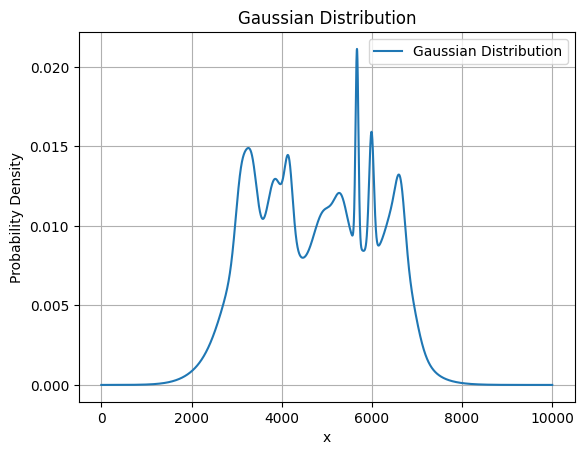

5669.4463306147045

In [46]:
n=17

mean = np.random.uniform(3000,7000,size=50)  # Mean of the distribution
std_dev = np.random.uniform(00,800,size=50)  # Standard deviation
x = np.linspace(0, 10000, 2**n)  # Range of x values
y = np.zeros_like(x)  # Initialize y values

for m,s in zip(mean,std_dev):
    y += (1 / (s * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - m) / s) ** 2)


# Plot the Gaussian distribution
plt.plot(x, y, label='Gaussian Distribution')
plt.title('Gaussian Distribution')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.grid()
plt.show()

x[np.argmax(y)]

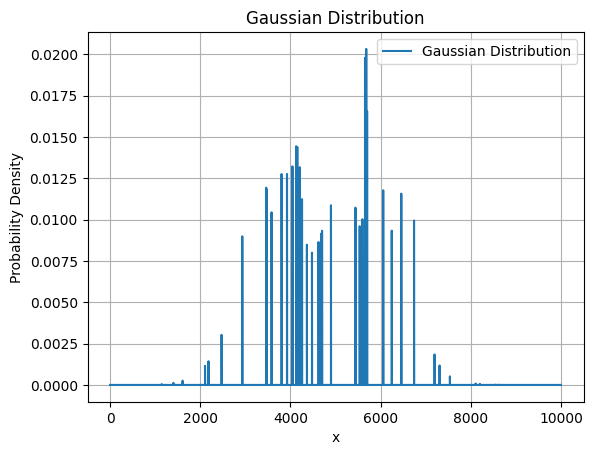

5681.271982360705

In [67]:
x_indexes = np.random.randint(0, 2**n, size=50)
y_sample = np.zeros_like(x)
y_sample[x_indexes] = y[x_indexes]

plt.plot(x, y_sample, label='Gaussian Distribution')
plt.title('Gaussian Distribution')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.grid()
plt.show()

x[np.argmax(y_sample)]

In [68]:
def monte_carlo_compressive_learning(Phi,y_sample,threshold=20):

    #Threshold
    y_sample[y_sample<threshold]=0

    #Measurements
    y = []
    y = np.array(Phi * np.matrix(y_sample).T).T[0]
    y = np.array(y)

    #Matching pursuit
    omp = OrthogonalMatchingPursuit(n_nonzero_coefs=50)
    omp.fit(Phi, y)
    coefficients = [ i if i>0 else 0 for i in omp.coef_]

    return coefficients

In [ ]:
#Random
Phi = np.random.rand(100,2**n)
# all_pat = []
# for i in range(n-3):
#     all_pat += create_specific_patterns4(i,i+1,i+2,i+3,n)
# Phi = np.array([dev_pattern(p) for p in all_pat])
thresh = np.percentile(y,90)

coefficients = monte_carlo_compressive_learning(Phi,y_sample,threshold=thresh)
print(np.nonzero(coefficients)[0])

y_display = np.zeros_like(x)
y_display[np.nonzero(coefficients)[0]] = y[np.nonzero(coefficients)[0]]

plt.bar(x, y_display, width=10)
plt.title('Gaussian Distribution')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.grid()
plt.show()

c:\Users\Baptiste\Documents\PhD\Projects\.venv\Lib\site-packages\sklearn\linear_model\_omp.py:445: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  out = _cholesky_omp(


[47288 53010 54075 54420 55129 74107 74465 74714]


KeyboardInterrupt: 

In [543]:
#Nearest neighbor quadruplets
all_pat = []
for i in range(n-3):
    all_pat += create_specific_patterns4(i,i+1,i+2,i+3,n)
Phi = np.array([dev_pattern(p) for p in all_pat])
thresh = np.percentile(sequence_cost,90)

res = []
for _ in range(600):
    coefficients = monte_carlo_compressive_learning(Phi,sequence_cost,threshold=thresh)
    good_opt = np.intersect1d(np.argpartition(sequence_cost, -20)[-20:],np.nonzero(coefficients)[0])
    res.append(1 if len(good_opt) > 0 else 0)
np.average(res)

0.59

In [544]:
#Nearest neighbor quintuplets
all_pat = []
for i in range(n-4):
    all_pat += create_specific_patterns5(i,i+1,i+2,i+3,i+4,n)
Phi = np.array([dev_pattern(p) for p in all_pat])
thresh = np.percentile(sequence_cost,90)

res = []
for _ in range(300):
    coefficients = monte_carlo_compressive_learning(Phi,sequence_cost,threshold=thresh)
    good_opt = np.intersect1d(np.argpartition(sequence_cost, -20)[-20:],np.nonzero(coefficients)[0])
    res.append(1 if len(good_opt) > 0 else 0)
np.average(res)

0.5466666666666666